In [8]:
from code_data_science import data_table as dt
df = dt.read_csv('../samples/gradle_wrappers.csv')
df.head()

,repositoryOrigin,repositoryPath,repositoryBranch,version,distribution
0,github.com,spring-projects/spring-kafka,main,8.2.1,bin
1,github.com,Netflix/Fenzo,master,6.8.3,all
2,github.com,spring-projects/spring-integration-samples,main,8.1.1,bin
3,github.com,Netflix/dgs-codegen,master,7.6,bin
4,github.com,spring-projects/spring-statemachine,main,7.6.1,bin


In [9]:
data = df.drop(columns=['repositoryOrigin', 'repositoryPath', 'repositoryBranch'])
data

,version,distribution
0,8.2.1,bin
1,6.8.3,all
2,8.1.1,bin
3,7.6,bin
4,7.6.1,bin
5,6.8.3,bin
6,8.2.1,bin
7,6.8.3,bin
8,8.2.1,bin
9,7.6,bin


In [10]:
versions = data.groupby(['version','distribution'], as_index=False).value_counts().pivot(index='version', columns='distribution').fillna(0)
versions

count      
distribution   all   bin
version                 
4.10.3         0.0   1.0
6.4            0.0   1.0
6.5            0.0   1.0
6.8.3          5.0  12.0
6.9            1.0   0.0
7.2            0.0   1.0
7.3.3          0.0   1.0
7.4.1          0.0   1.0
7.4.2          1.0   4.0
7.5            0.0   1.0
7.5.1          0.0   5.0
7.6            1.0   8.0
7.6.1          0.0   3.0
7.6.2          0.0   2.0
8.1.1          0.0   1.0
8.2.1          0.0   9.0

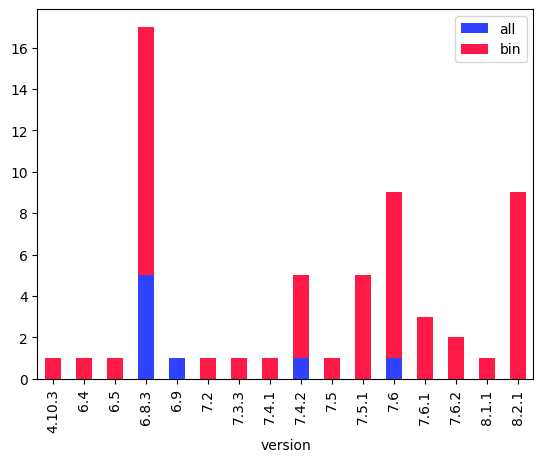

In [17]:
import code_data_science.palette as palette
import matplotlib.pyplot as plt

colors = [
    palette.__moderneColorMap['blue']['main'],
    palette.__moderneColorMap['red']['main']
]

ax = versions.plot.bar(stacked=True,)
ax.legend(['all', 'bin'])